In [1]:
import pandas as pd 
import numpy as np
from bs4 import BeautifulSoup 
import urllib.request
import warnings 
warnings.filterwarnings('ignore')
web = 'http://www.sports-reference.com/olympics/countries/USA/summer/2016/'
req = urllib.request.Request(web)
page = urllib.request.urlopen(req)
soup = BeautifulSoup(page,'lxml')

In [2]:
table = soup.find_all('div',{'id':'div_athletes'})

In [3]:
A = []
B = []
C = []
D = []
E = []
F = []
G = []
H = []
L = []

In [4]:
for row in soup.find_all('tr'):
    result = row.find_all('td')
    if len(result) == 9:
        A.append(result[0].get_text())
        B.append(result[1].get_text())
        C.append(result[2].get_text())
        D.append(result[3].get_text())
        E.append(result[4].get_text())
        F.append(result[5].get_text())
        G.append(result[6].get_text())
        H.append(result[7].get_text())
        L.append(result[8].get_text())

In [5]:
df = pd.DataFrame(A, columns = ['Rank'])

In [6]:
df['Athele'] = B
df['Gender'] = C
df['Age'] = D
df['Sport'] = E
df['Gold'] = F
df['Sliver'] = G
df['Bronze'] = H
df['Total'] = L
df.head()

,Rank,Athele,Gender,Age,Sport,Gold,Sliver,Bronze,Total
0,1,Michael Phelps,Male,31,Swimming,5,1,,6
1,2,Katie Ledecky,Female,19,Swimming,4,1,,5
2,3,Simone Biles,Female,19,Gymnastics,4,,1,5
3,4,Simone Manuel,Female,20,Swimming,2,2,,4
4,5,Maya DiRado,Female,23,Swimming,2,1,1,4


In [7]:
web = 'http://www.sports-reference.com/olympics/summer/2016/'
req = urllib.request.Request(web)
page = urllib.request.urlopen(req)
soup = BeautifulSoup(page,'lxml')

In [8]:
table = soup.find("div", {"id": "div_countries"})
URL = []
for a in table.find_all('a',href=True):
    URL.append(a['href'])

In [9]:
URL

['/olympics/countries/USA/summer/2016/',
 '/olympics/countries/CHN/summer/2016/',
 '/olympics/countries/GBR/summer/2016/',
 '/olympics/countries/RUS/summer/2016/',
 '/olympics/countries/GER/summer/2016/',
 '/olympics/countries/FRA/summer/2016/',
 '/olympics/countries/JPN/summer/2016/',
 '/olympics/countries/AUS/summer/2016/',
 '/olympics/countries/ITA/summer/2016/',
 '/olympics/countries/CAN/summer/2016/',
 '/olympics/countries/KOR/summer/2016/',
 '/olympics/countries/NED/summer/2016/',
 '/olympics/countries/BRA/summer/2016/',
 '/olympics/countries/NZL/summer/2016/',
 '/olympics/countries/KAZ/summer/2016/',
 '/olympics/countries/AZE/summer/2016/',
 '/olympics/countries/ESP/summer/2016/',
 '/olympics/countries/HUN/summer/2016/',
 '/olympics/countries/DEN/summer/2016/',
 '/olympics/countries/KEN/summer/2016/',
 '/olympics/countries/UZB/summer/2016/',
 '/olympics/countries/JAM/summer/2016/',
 '/olympics/countries/CUB/summer/2016/',
 '/olympics/countries/SWE/summer/2016/',
 '/olympics/coun

In [10]:
len(URL)

86

In [11]:
URLfull = []
for i in URL:
    URLfull.append("http://www.sports-reference.com"+i)

In [12]:
URLfull

['http://www.sports-reference.com/olympics/countries/USA/summer/2016/',
 'http://www.sports-reference.com/olympics/countries/CHN/summer/2016/',
 'http://www.sports-reference.com/olympics/countries/GBR/summer/2016/',
 'http://www.sports-reference.com/olympics/countries/RUS/summer/2016/',
 'http://www.sports-reference.com/olympics/countries/GER/summer/2016/',
 'http://www.sports-reference.com/olympics/countries/FRA/summer/2016/',
 'http://www.sports-reference.com/olympics/countries/JPN/summer/2016/',
 'http://www.sports-reference.com/olympics/countries/AUS/summer/2016/',
 'http://www.sports-reference.com/olympics/countries/ITA/summer/2016/',
 'http://www.sports-reference.com/olympics/countries/CAN/summer/2016/',
 'http://www.sports-reference.com/olympics/countries/KOR/summer/2016/',
 'http://www.sports-reference.com/olympics/countries/NED/summer/2016/',
 'http://www.sports-reference.com/olympics/countries/BRA/summer/2016/',
 'http://www.sports-reference.com/olympics/countries/NZL/summer/

In [14]:
for i in range(len(URLfull)):
    req = urllib.request.Request(URLfull[i])
    page = urllib.request.urlopen(req)
    soup = BeautifulSoup(page,'lxml')
    table = soup.find("div", {"id": "div_athletes"})
    A = []
    B = []
    C = []
    D = []
    E = []
    F = []
    G = []
    H = []
    L = []
    for row in soup.find_all('tr'):
        result = row.find_all('td')
        if len(result) == 9:
            A.append(result[0].get_text())
            B.append(result[1].get_text())
            C.append(result[2].get_text())
            D.append(result[3].get_text())
            E.append(result[4].get_text())
            F.append(result[5].get_text())
            G.append(result[6].get_text())
            H.append(result[7].get_text())
            L.append(result[8].get_text())
    import pandas as pd 
    df = pd.DataFrame(A, columns=['Rank'])
    df['Athele'] = B
    df['Gender'] = C
    df['Age'] = D
    df['Sport'] = E
    df['Gold'] = F
    df['Sliver'] = G
    df['Bronze'] = H
    df['Total'] = L
    df.to_csv(r'athele_gender_2016.txt', header = None, index = None,sep = ',', mode = 'a', encoding = 'utf-8')

In [15]:
gender = pd.read_csv("athele_gender_2016.txt", header = None)

In [16]:
gender.columns = ['Rank', 'Athelet', 'Gender','Age','Sport','Gold','Silver',
                 'Bronze','Total']

In [17]:
gender.shape

(10086, 9)

In [18]:
event = pd.read_csv('event.txt', sep = ',')

In [19]:
event['Men'] = event['Men'].apply(lambda st: int(st.replace(",","")))

In [20]:
event['Women'] = event['Women'].apply(lambda st: int(st.replace(",","")))

In [21]:
event

,Year,City,Country,Countries,Participants,Men,Women,Sports,Events
0,2016,Rio de Janeiro,Brazil,207,"11,191",6147,5037,34,306
1,2012,London,Great Britain,205,"10,517",5864,4653,32,302
2,2008,Beijing,China,204,"10,902",6290,4610,34,303
3,2004,Athens,Greece,201,"10,560",6257,4303,34,301
4,2000,Sydney,Australia,200,"10,648",6579,4068,34,300
5,1996,Atlanta,United States,197,"10,344",6820,3521,31,271
6,1992,Barcelona,Spain,169,"9,386",6659,2721,29,257
7,1988,Seoul,South Korea,159,"8,454",6249,2203,27,237
8,1984,Los Angeles,United States,140,"6,799",5224,1567,26,221
9,1980,Moscow,Soviet Union,80,"5,259",4135,1123,23,203


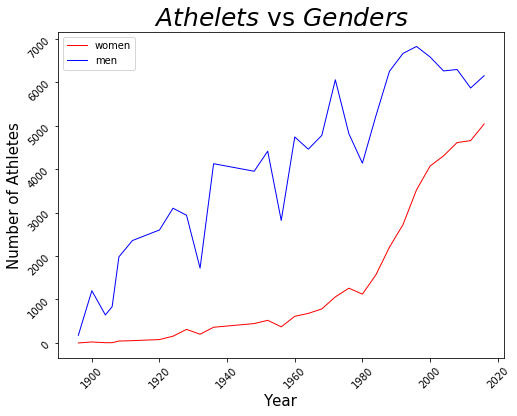

In [23]:
# gender distribution in all olympics
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,6))
plt.plot(event['Year'],event['Women'],color = 'Red', linewidth = 1.0, linestyle = "-", label = 'women')
plt.plot(event['Year'],event['Men'],color = 'Blue', linewidth = 1.0, linestyle = "-", label = 'men')
plt.legend(loc = 'upper left')
plt.title('$Athelets$ vs $Genders$', fontsize = 25)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Number of Athletes', fontsize = 15)
plt.xticks(fontsize = 10, rotation = 45)
plt.yticks(fontsize = 10, rotation = 45)
plt.show()

In [24]:
gender.head()

,Rank,Athelet,Gender,Age,Sport,Gold,Silver,Bronze,Total
0,1,Michael Phelps,Male,31,Swimming,5.0,1.0,NaN,6.0
1,2,Katie Ledecky,Female,19,Swimming,4.0,1.0,NaN,5.0
2,3,Simone Biles,Female,19,Gymnastics,4.0,NaN,1.0,5.0
3,4,Simone Manuel,Female,20,Swimming,2.0,2.0,NaN,4.0
4,5,Maya DiRado,Female,23,Swimming,2.0,1.0,1.0,4.0


In [26]:
gender.groupby('Gender').agg({'Gold':np.sum, 'Silver':np.sum,'Total':np.sum}).reset_index()

,Gender,Gold,Silver,Total
0,Female,306.0,308.0,933.0
1,Male,334.0,323.0,1016.0


In [34]:
dic ={'Type': ['Gold','Gold','Silver','Silver','Bronze','Bronze','Total','Total'],
      'Gender':['Female','Male','Female','Male','Female','Male','Female','Male'],
      'Medals':[306,334,308,323,319,359,933,1016],
      'Percentage':[306/5037.0,334/6147.0,308/5037.0,323/6147.0,319/5037.0,359/6147.0,933/5037.0,1016/6147.0]}
df = pd.DataFrame(dic)

In [35]:
df

,Type,Gender,Medals,Percentage
0,Gold,Female,306,0.060750
1,Gold,Male,334,0.054335
2,Silver,Female,308,0.061148
3,Silver,Male,323,0.052546
4,Bronze,Female,319,0.063331
5,Bronze,Male,359,0.058402
6,Total,Female,933,0.185229
7,Total,Male,1016,0.165284


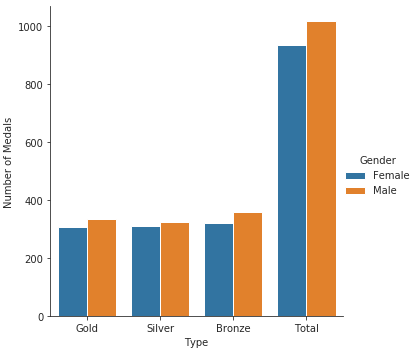

In [36]:
import seaborn as sns
with sns.axes_style(style = 'ticks'):
    g = sns.factorplot("Type",'Medals','Gender', data = df, kind = 'bar')
    g.set_axis_labels("Type","Number of Medals")
plt.show()

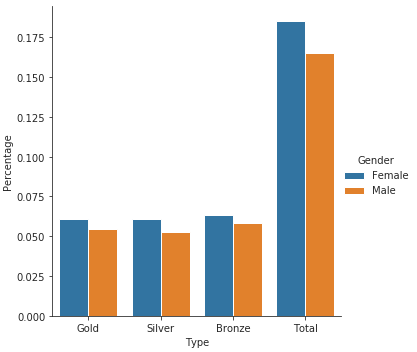

In [37]:
import seaborn as sns
with sns.axes_style(style = 'ticks'):
    g = sns.factorplot("Type",'Percentage','Gender', data = df, kind = 'bar')
    g.set_axis_labels("Type","Percentage")
plt.show()

In [38]:
sport = gender.groupby(['Gender','Sport']).agg({'Total':np.sum}).reset_index()

In [39]:
sport = sport.sort_values(by='Total', ascending=False)

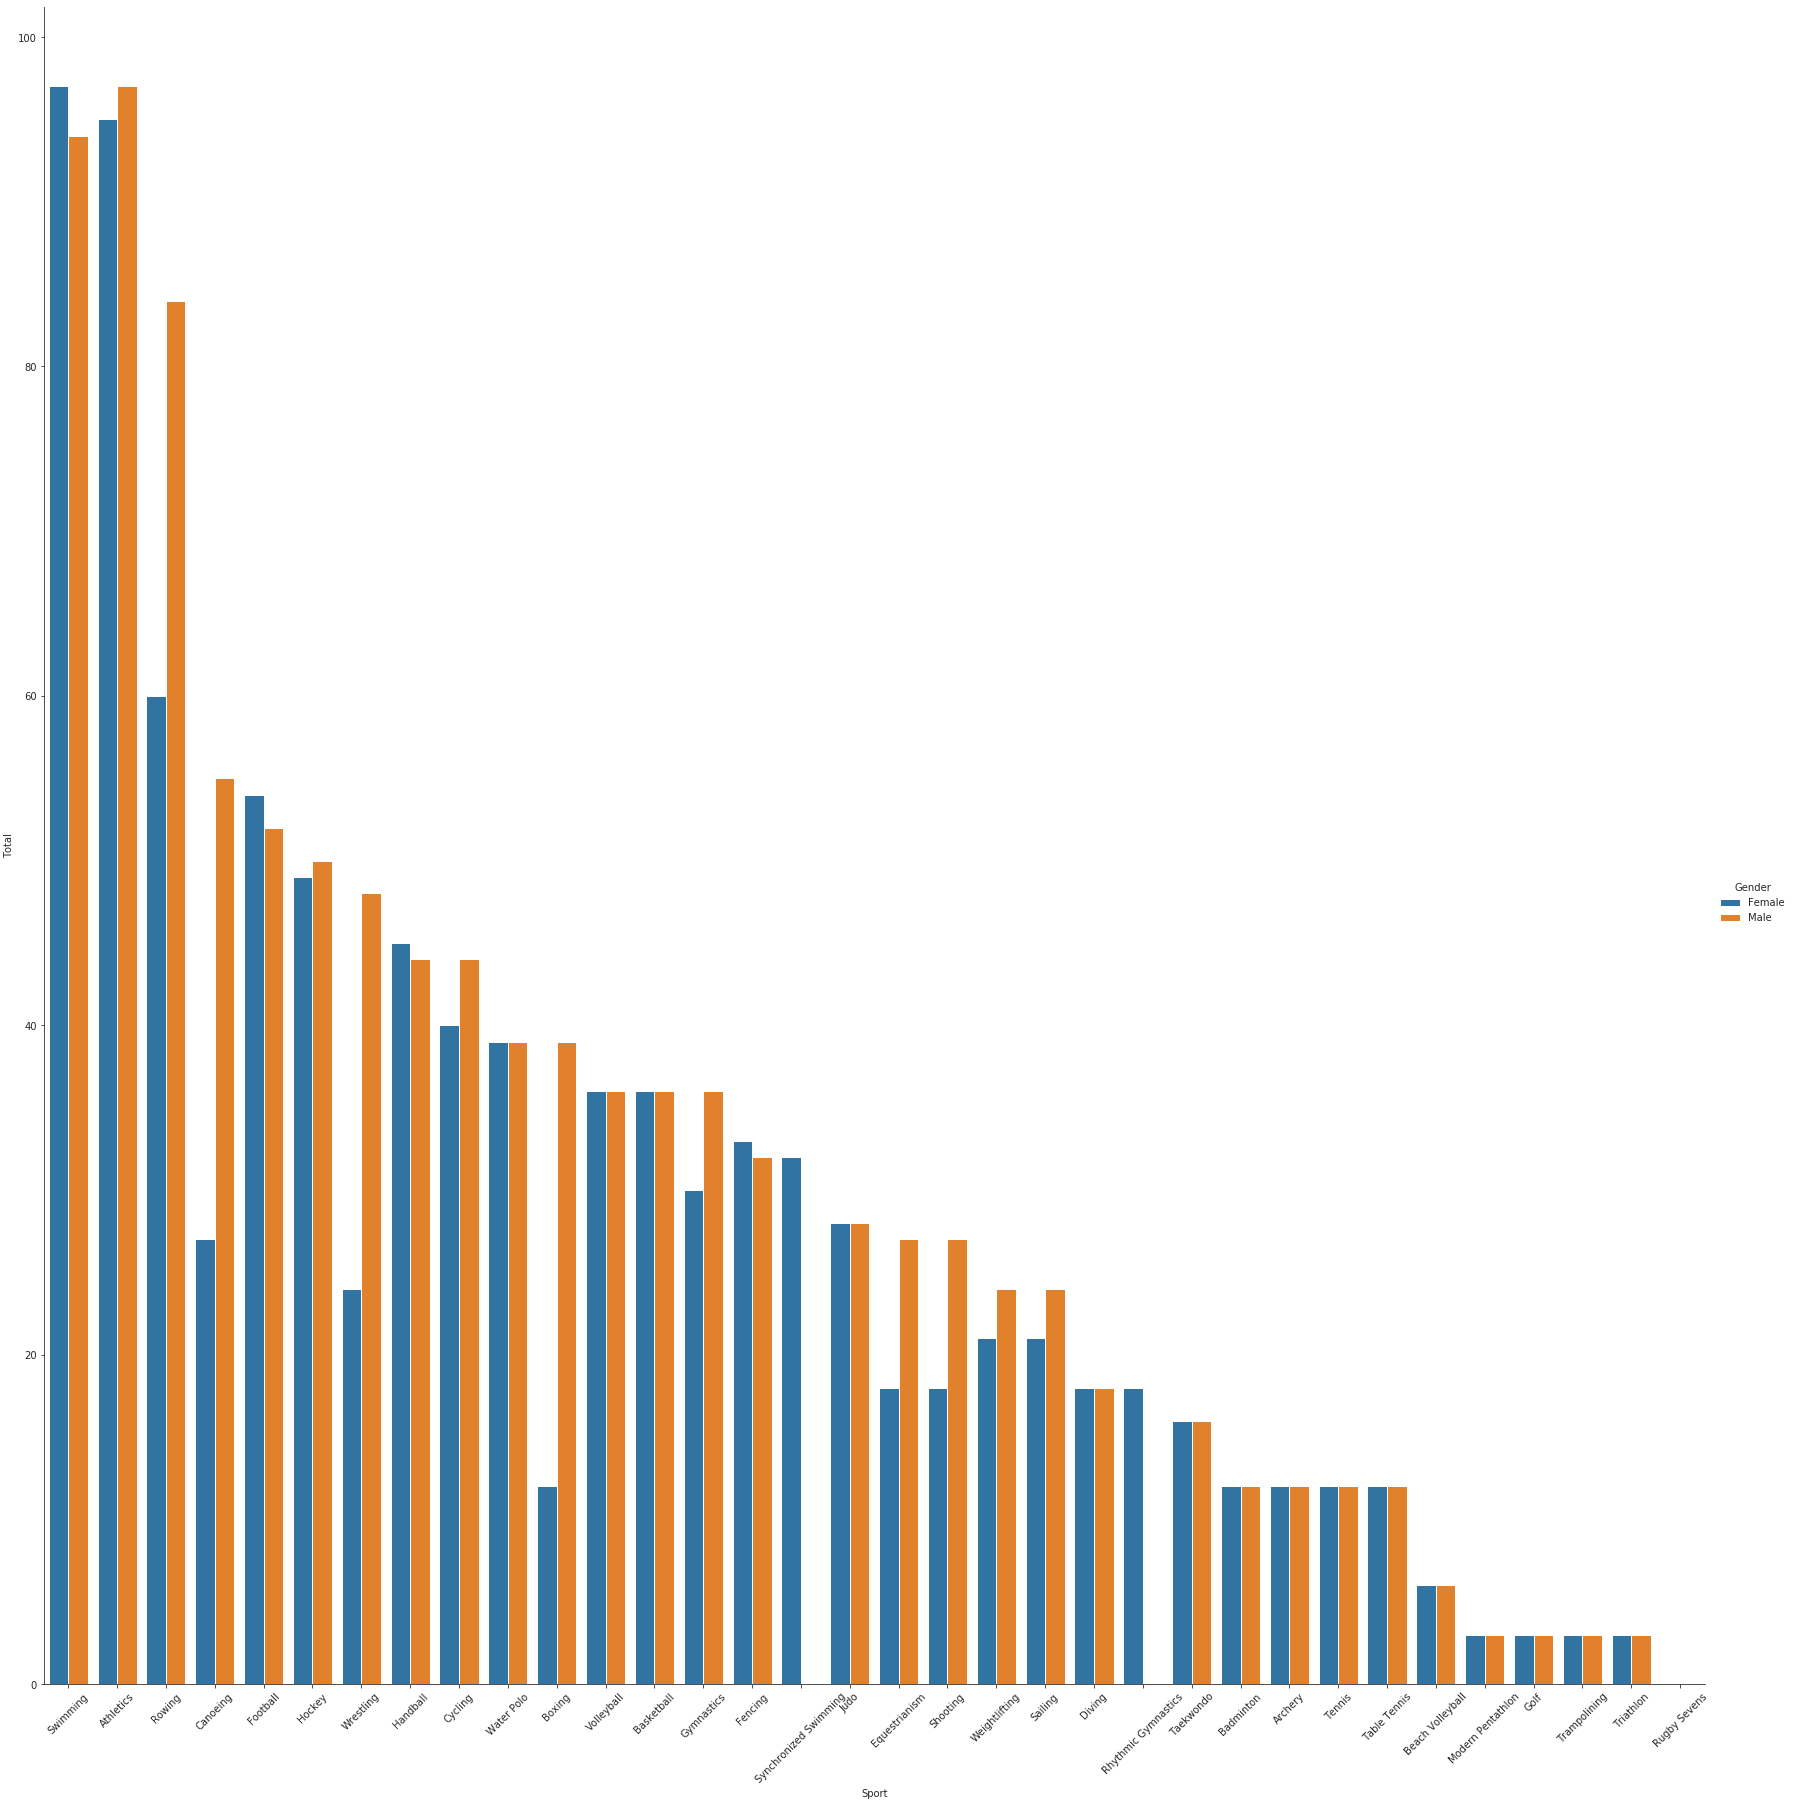

In [40]:
with sns.axes_style(style = 'ticks'):
    g = sns.factorplot("Sport",'Total','Gender', data = sport, kind = 'bar',size = 24)
    g.set_axis_labels("Sport","Total")
g.set_xticklabels(rotation = 45)
plt.show()

In [41]:
gender.head()

,Rank,Athelet,Gender,Age,Sport,Gold,Silver,Bronze,Total
0,1,Michael Phelps,Male,31,Swimming,5.0,1.0,NaN,6.0
1,2,Katie Ledecky,Female,19,Swimming,4.0,1.0,NaN,5.0
2,3,Simone Biles,Female,19,Gymnastics,4.0,NaN,1.0,5.0
3,4,Simone Manuel,Female,20,Swimming,2.0,2.0,NaN,4.0
4,5,Maya DiRado,Female,23,Swimming,2.0,1.0,1.0,4.0


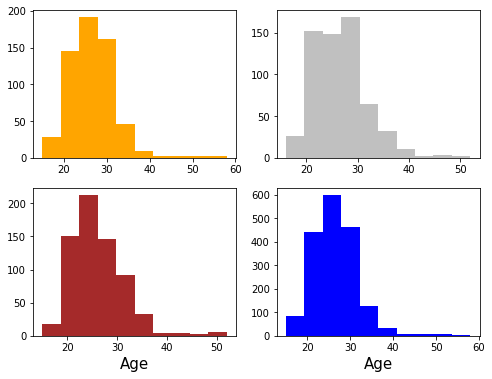

In [48]:
# Age
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
plt.hist(gender[gender['Gold']>0]['Age'], color = 'orange')
plt.subplot(2,2,2)
plt.hist(gender[gender['Silver']>0]['Age'], color = 'silver')
plt.subplot(2,2,3)
plt.hist(gender[gender['Bronze']>0]['Age'], color = 'brown')
plt.xlabel('Age',fontsize = 15)
plt.subplot(2,2,4)
plt.hist(gender[gender['Total']>0]['Age'], color = 'blue')
plt.xlabel('Age',fontsize = 15)
plt.show()

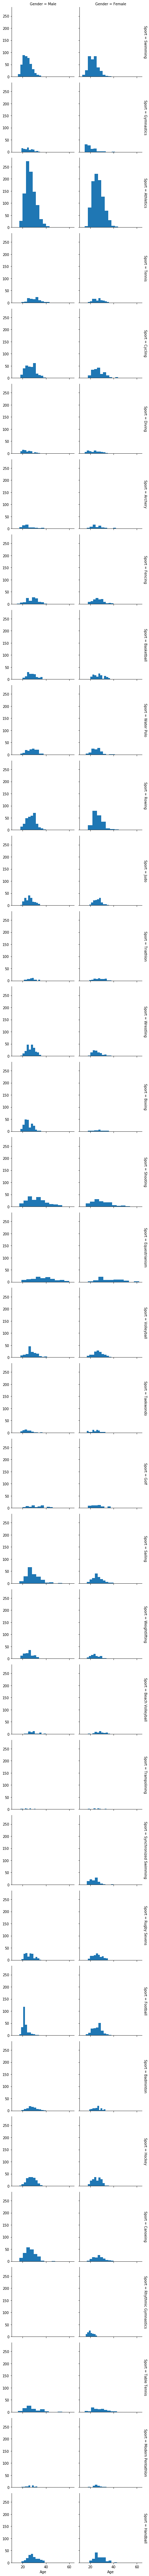

In [50]:
grid = sns.FacetGrid(gender, row = 'Sport', col = 'Gender', margin_titles = True)
grid.map(plt.hist,'Age')
plt.show()